In [1]:
# -*- coding: utf-8 -*-

import os, json, re, random
from os.path import join, dirname, basename, split, splitext
from collections import Counter, defaultdict, OrderedDict

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import general as ge

%matplotlib inline

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [3]:
def count_cooccurrrence(word, word1, window_length, words_numbers):
    indices_v = np.where(words_numbers == word)
    indices_v1 = np.where(words_numbers == word1)
    distances = np.zeros([np.size(indices_v), np.size(indices_v1)])
    for ind in np.arange(np.size(indices_v)):
        index_v = indices_v[0][ind]
        distances[ind, :] = np.absolute(indices_v1 - index_v)
    threshold = window_length / 2
    return np.sum(distances <= threshold)

def cooccurrence_m(vocab_numbers, words_numbers, window_length):
    m = np.zeros([len(vocab_numbers), len(vocab_numbers)])
    for ind,v in list(enumerate(vocab_numbers))[:-1]:
        for ind1 in range(ind+1, len(vocab_numbers)):
            v1 = vocab_numbers[ind1]
            m[ind, ind1] = count_cooccurrrence(v, v1, window_length, words_numbers)
    m = m + m.transpose()
    return m

In [4]:
# Parameters.

window_length = 200
threshold = 4

In [5]:
# Reading and pre-treatment the text.
# The words are filtered for multiple times.
# There's unclear issue that the order of the stemming and threshold.

_, words = ge.read_file('1813 PRIDE AND PREJUDICE.txt', use_zip=0, zf='none')

length_original_text = len(words)

# Pre-treatment.
# stopwords
words = [w for w in words if not w in stopwords.words('english')]
# stem
words = [porter.stem(w) for w in words]
vocab = list(set(words))
# threshold for number of appearances
c = Counter(words)
vocab = [w for w,count in c.items() if count <= threshold]
words = [w for w in words if w in vocab]

In [118]:
# Map strings (words, vocab) into numbers for speed.
# For any string list, convert to numpy arrays, then feed them into the function.

# test
# vocab = [1, 2, 3, 4]
# words = [1,3,2,2,4,1,3,2,3]

words_numbers = [vocab.index(w) for w in words]
words_numbers = np.array(words_numbers)
vocab_numbers = np.arange(len(vocab))

In [119]:
# Map the text into a cooccurrence matrix.

m = cooccurrence_m(vocab_numbers, words_numbers, window_length)

In [135]:
# Build the random matrix.
c = Counter(words_numbers)
r = np.zeros([np.size(vocab_numbers), np.size(vocab_numbers)])
for ind,w in list(enumerate(vocab_numbers))[:-1]:
    for ind1 in range(ind+1, len(vocab_numbers)):
        w1 = vocab_numbers[ind1]
        r[ind, ind1] = float(window_length) * c[w] * c[w] / length_original_text
r = r + r.transpose()

In [124]:
U, s, V = np.linalg.svd(m)

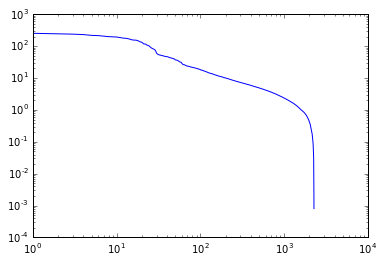

In [132]:
plt.loglog(s)

In [8]:
# Devide text into parts.

texts = []
for ind in range(num_window):
    tmp = words[ind*len_window:(ind+1)*len_window]
    texts.append(tmp)